# Лабораторная работа №6
# Приближённое решение краевой задачи для обыкновенного дифференциального уравнения

Найти приближённое решение краевой задачи для обыкновенного дифференциального уравнения на отрезке [0, 1] с шагом h = 0.05. Для вычисления решения использовать метод прогонки с краевыми условиями первого и второго порядка точности. Для сравнения приведено точное решение u_0(x).

Вариант 18

$$ u'' + (\tanh{x})u' + \frac{1}{\cosh^2{x}}u = -2\tanh{x} - \frac{2x}{\cosh^2{x}} $$

$$u(0) - u'(0) = 3,\quad u(1) = -1.3519$$
\
\
$$Exact\ solution$$
$$u_0(x) = \frac{1}{\cosh{x}}-2x$$

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# y'' + p(x)y' + q(x)y = f(x), 0 < x < l
# alpha1 * y(0) + beta1 * y'(0) = gamma1
# alpha2 * y(1) + beta2 * y'(1) = gamma2

def p(x):
    return np.tanh(x)

def q(x):
    return 1/(np.cosh(x))

def f(x):
    return -2*np.tanh(x)-2*x/(np.cosh(x)**2)

a = 0
b = 1

alpha = np.array([1, 1])
beta = np.array([-1, 0])
gamma = np.array([3, -1.3519])

h = 0.01

In [34]:
def exact_solution(x):
    return (1/np.cosh(x)) - 2*x

In [35]:
def solve1order(p, q, f, alpha, beta, gamma, a, b, h):
    x = np.arange(a, b, h)

    a = np.zeros(len(x))
    b = np.zeros(len(x))
    c = np.zeros(len(x))
    f_ar = np.zeros(len(x))
    
    if beta[0] != 0:
        a[0] = 0
        b[0] = alpha[0] - beta[0] / h
        c[0] = beta[0] / h
        f_ar[0] = gamma[0]
    else:
        a[0] = 0
        b[0] = alpha[0]
        c[0] = 0
        f_ar[0] = gamma[0]
    if beta[1] != 0:
        a[-1] = -beta[1] / h
        b[-1] = alpha[1] + beta[1] / h
        c[-1] = 0
        f_ar[-1] = gamma[1]
    else:
        a[-1] = 0
        b[-1] = alpha[1]
        c[-1] = 0
        f_ar[-1] = gamma[1]

    for i in range(1, len(x) - 1):
        a[i] = 1 / (h ** 2) - p(x[i]) / (2 * h)
    for i in range(1, len(x) - 1):
        b[i] = -2 / (h ** 2) + q(x[i])
    for i in range(1, len(x) - 1):
        c[i] = 1 / (h ** 2) + p(x[i]) / (2 * h)
    for i in range(1, len(x) - 1):
        f_ar[i] = f(x[i])

    return solvematrix(a, b, c, f_ar)

In [36]:
def solvematrix(a, b, c, f):
    A = np.zeros(len(f))
    B = np.zeros(len(f))
    A[0] = -c[0] / b[0]
    B[0] = f[0] / b[0]
    for i in range(1, len(f) - 1):
        A[i] = -c[i] / (b[i] + a[i] * A[i - 1])
        B[i] = (f[i] - a[i] * B[i - 1]) / (b[i] + a[i] * A[i - 1])
    A[-1] = 0
    B[-1] = (f[-1] - a[-1] * B[-2]) / (b[-1] + a[-1] * A[-2])

    y = np.zeros(len(f))
    y[-1] = B[-1]
    for i in range(len(f) - 2, -1, -1):
        y[i] = B[i] + A[i] * y[i + 1]
    return y

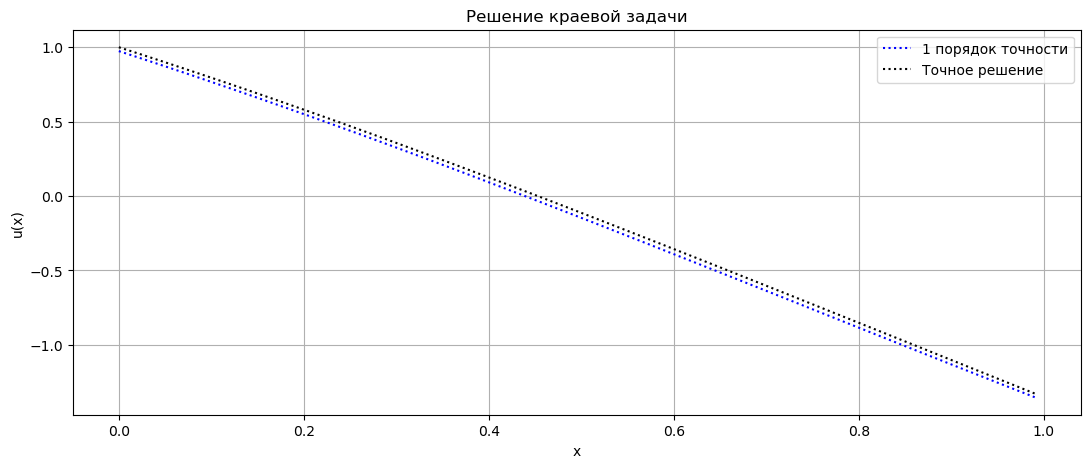

In [37]:
xrange = np.arange(a, b, h)

y1 = solve1order(p, q, f, alpha, beta, gamma, a, b, h)

fig = plt.figure(figsize=(13,5)) 
plt.title("Решение краевой задачи")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()
plt.plot(xrange, y1, ':', color='blue', label='1 порядок точности')
plt.plot(xrange, exact_solution(xrange), ':', color='black', label='Точное решение')
plt.legend()

plt.show()

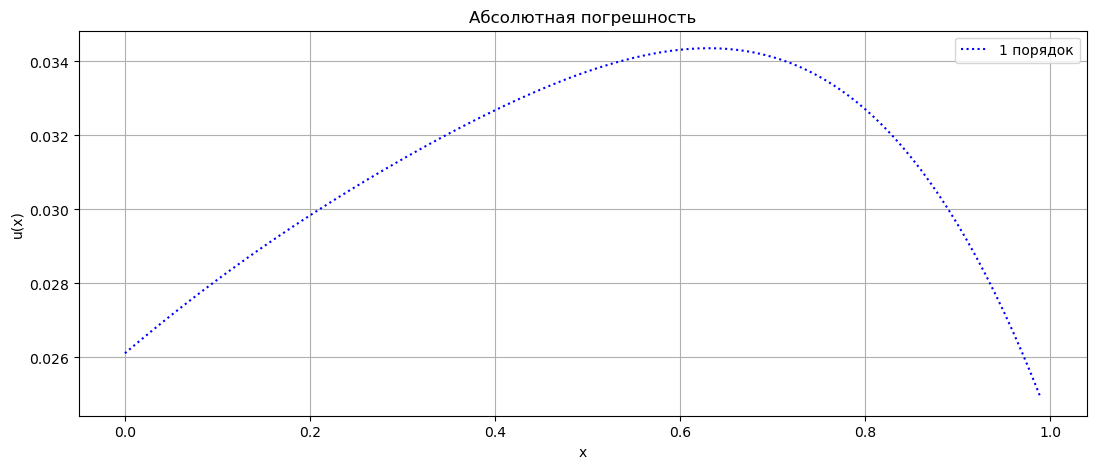

In [38]:
xrange = np.arange(a, b, h)

y1 = solve1order(p, q, f, alpha, beta, gamma, a, b, h)
y = exact_solution(xrange)

fig = plt.figure(figsize=(13,5)) 
plt.title("Абсолютная погрешность")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()
plt.plot(xrange, abs(y1 - y), ':', color='blue', label='1 порядок')
plt.legend()

plt.show()

[1e-05, 0.0001, 0.001, 0.01, 0.1]


Text(0.5, 0.98, 'Погрешности u(x)')

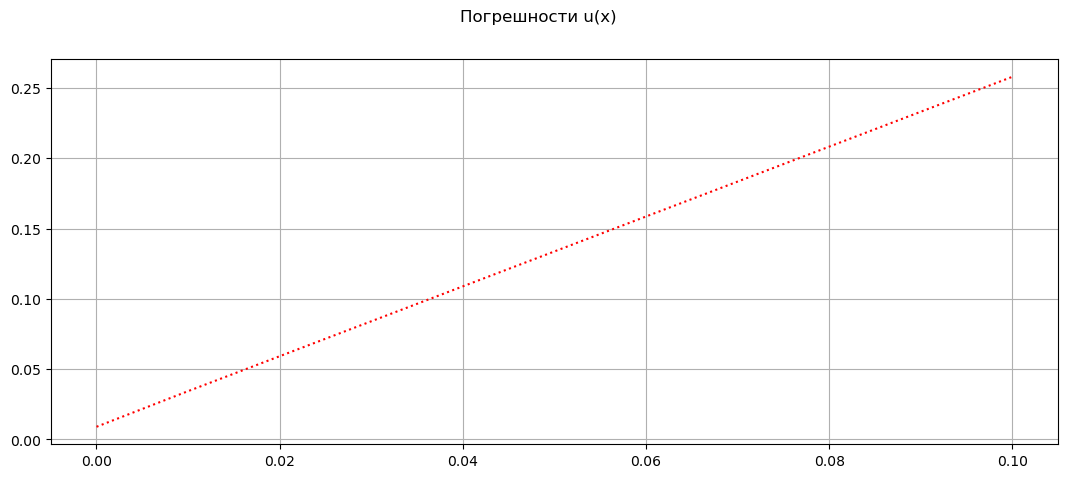

In [39]:
steps = [10**i for i in range(-5, 0, 1)]

dy = list()

for step in steps:  
    x = np.arange(a, b, step)
    y = exact_solution(x)

    y_solved = solve1order(p, q, f, alpha, beta, gamma, a, b, step)
    
    dy.append(max(abs(y-y_solved)))
    
print(steps)

fig = plt.figure(figsize=(13,5)) 
plt.plot(steps, dy, ':', color='red')
plt.grid(True)


fig.suptitle(f"Погрешности u(x)")
